In [1]:
import numpy as np
import scipy
import scipy.fft
from scipy.fft import fft, fftfreq, ifft
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.io
import librosa
np.set_printoptions(threshold=100)

# Import Sound File from Library

In [123]:
file = librosa.load('/Users/ryanbergner/Dropbox/School/Fall 2021/Matrix Methods:Applications/Final Project/data/Startingfile.wav')
file

(array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.8401162e-05,
        1.7894254e-04, 2.4782095e-04], dtype=float32), 22050)

In [3]:
sample_rate = file[1]
samples = file[0]
print(str(sample_rate) + " is the sample rate" + " , " + str(len(samples)) + " samples in file")

22050 is the sample rate , 136857 samples in file


In [4]:
# Play original file
from IPython.display import Audio
Audio('/Users/ryanbergner/Dropbox/School/Fall 2021/Matrix Methods:Applications/Final Project/data/Startingfile.wav')

In [5]:
# length of .wav file in seconds
duration = int(len(samples)/sample_rate)
print("input .wav file is about" + " " + str(duration) + " " + "seconds long")

input .wav file is about 6 seconds long


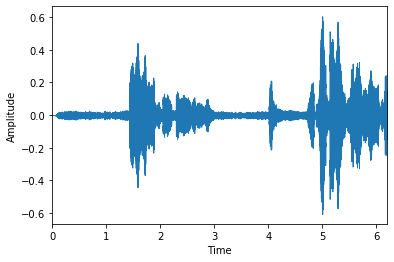

In [6]:
# plot soundwave
from librosa import display
plt.figure()
librosa.display.waveplot(y = samples, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [142]:
# define fft functions

def fft_plot(sound, rate):
    n = len(sound)
    T = 1/sample_rate
    y = (scipy.fft.fft(sound)) # scipy fft algorithm 
    x = np.linspace(0, 1.0/(2.0*T), n/2) #scales x axis
    mainplt, ax = plt.subplots()
    ax.plot(x, 2.0/n * np.abs(y[:n//2])) #turns negative compelx numbers to positive
    plt.grid()
    plt.xlabel("Freq")
    plt.ylabel("Magnitude")
    return plt.show()


def fft_deep_plot(sound, rate):
    n = len(sound)
    T = 1/sample_rate
    y = (scipy.fft.fft(sound) - 100)
    x = np.linspace(0, 1.0/(2.0*T), n/2) #scales x axis
    mainplt, ax = plt.subplots()
    ax.plot(x, 2.0/n * np.abs(y[:n//2]), color = "Red") #turns negative compelx numbers to positive
    plt.grid()
    plt.xlabel("Freq")
    plt.ylabel("Magnitude")
    return plt.show()

def fft_array(sound, rate): # 
    n = len(sound)
    T = 1/sample_rate
    y = scipy.fft.fft(sound)
    return y


def fft_array_deep(sound, rate): # 
    n = len(sound)
    T = 1/sample_rate
    y = (scipy.fft.fft(sound) - 50)
    return y


In [143]:
longarray = fft_array(samples, sample_rate)
longarray[0:40] # first 40 elements
max(longarray)

(586.78064+133.67897j)

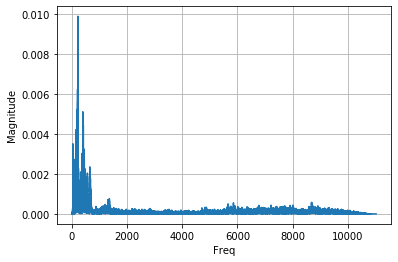

In [144]:
fft_plot(samples, sample_rate)

In [145]:
long_array_deep = fft_array_deep(samples, sample_rate)
long_array_deep[:30]

array([-49.23783 -0.j        , -51.16527 +0.88283086j,
       -49.64174 -1.5857176j , -50.878567+0.8092307j ,
       -51.3628  +1.5586596j , -51.024284+0.7283529j ,
       -49.415474-1.2241337j , -52.3006  +1.1118681j ,
       -48.701595+0.5503695j , -51.773155-0.44656837j,
       -51.203754+1.5780263j , -50.66522 +0.32625052j,
       -51.69667 -1.5333097j , -50.261696-0.6092026j ,
       -50.301804+0.7114515j , -51.45147 -1.0164379j ,
       -50.272846+0.6583358j , -50.331215+0.8880477j ,
       -49.328033-1.1975565j , -50.284306+0.5501405j ,
       -50.810658+0.11726108j, -49.192005+0.6412027j ,
       -50.728233-0.35277557j, -51.14562 -1.3300402j ,
       -50.34655 -0.07980609j, -48.936363+0.33485615j,
       -49.66268 -0.09421086j, -51.35878 -0.30443406j,
       -50.36014 +0.803877j  , -49.430153-0.04435885j], dtype=complex64)

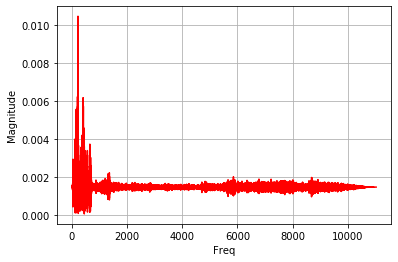

In [146]:
fft_deep_plot(samples, sample_rate)

In [147]:
from scipy import ifft
inverse_data = scipy.fft.irfft(long_array_deep)

In [158]:
inverse_data[:100]

array([-4.9999996e+01, -1.6777797e-06,  1.3504363e-06, -1.4199989e-06,
        1.3905681e-06, -1.3860915e-06,  1.3415207e-06, -1.3200560e-06,
        1.3656618e-06, -1.3834222e-06,  1.3067753e-06, -1.3495089e-06,
        1.2827247e-06, -1.3196029e-06,  1.2828625e-06, -1.2452539e-06,
        1.1821849e-06, -1.1051138e-06,  1.1412772e-06, -1.1469642e-06,
        1.0918724e-06, -1.2168648e-06,  1.1925865e-06, -1.0665447e-06,
        1.0597157e-06, -1.1100817e-06,  1.0616517e-06, -1.0979813e-06,
        1.0962158e-06, -9.5810310e-07,  1.0040521e-06, -9.4577615e-07,
        1.1449441e-06, -9.8482712e-07,  9.6671056e-07, -9.5252096e-07,
        9.2811035e-07, -9.2362569e-07,  9.0906627e-07, -9.0035041e-07,
        8.6946875e-07, -9.1580830e-07,  9.0166554e-07, -8.1049495e-07,
        8.7322303e-07, -8.4236490e-07,  8.2959025e-07, -8.4639333e-07,
        7.6216207e-07, -8.6547112e-07,  7.8673190e-07, -7.1166147e-07,
        7.2796081e-07, -7.1535516e-07,  7.5727320e-07, -7.2150925e-07,
      

In [157]:
len(inverse_data)

273712

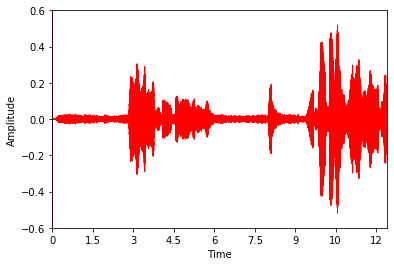

In [154]:
plt.figure()
librosa.display.waveplot(y = inverse_data, sr = sample_rate, color = "red")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.ylim(-.6, .6)
plt.show()

In [15]:
#inverse_data = [sample_rate, inverse_data]

In [155]:
from scipy.io.wavfile import write
write("new_1.wav", sample_rate, inverse_data)

In [156]:
Audio('/Users/ryanbergner/Dropbox/School/Fall 2021/Matrix Methods:Applications/Final Project/new_1.wav')

# Implementation of the DFT algorithm (From a 1D sound file)

In [19]:
x = np.asarray(samples, dtype=float)[:-1]
print(x)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.43795283e-05
  2.84011621e-05  1.78942544e-04]


In [48]:
N = x.shape[0]
N

136856

In [49]:
n = np.arange(N)
n

array([     0,      1,      2, ..., 136853, 136854, 136855])

In [50]:
k = n.reshape((N, 1))
k

array([[     0],
       [     1],
       [     2],
       ...,
       [136853],
       [136854],
       [136855]])

In [23]:
#too long and computationally expensive to be run in a reasonable amount of time
#M = np.exp(-2j * np.pi * k * n / N)
#M

In [24]:
# Algorithm Blueprint
def myfft(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    N = x.shape[0]
    
    X_even = myfft(x[::2])
    X_odd = myfft(x[1::2])
    n_idx = np.arange(N)
    factor = W_N(N,n_idx, 1)
    return np.concatenate([X_even + factor[:N // 2] * X_odd,
          
                            X_even + factor[N // 2:] * X_odd])

In [25]:
np.log2(N)

17.062299160732607

In [52]:
# approximate to 17 (rounding down)
2**np.floor(np.log2(N))

131072.0

In [53]:
N - 2**np.floor(np.log2(N))

5784.0

# Make size a power of 2 

In [89]:
import sys
import numpy
numpy.set_printoptions(threshold=1000)
def forrier(N,k,n):
    return np.exp(-1j * 2 * np.pi * k * n / N)


def printArray(arr):
    for row in arr:
        for item in row:
            print("{:8.3f}".format(item), end = " ")
        print("")
        
np.printoptions(precision=2, suppress=True)

In [102]:
np.printoptions(precision=2, suppress=True)
# Size must be a power of 2

x_new = np.asarray(x, dtype=float)[5784:]
with np.printoptions(precision=4, suppress=True,threshold=np.inf, linewidth=100):
    print(x_new[:500])

[-0.005  -0.0052 -0.0059 -0.0065 -0.0068 -0.007  -0.0071 -0.0076 -0.0085 -0.0097 -0.011  -0.0122
 -0.0131 -0.0141 -0.0149 -0.0156 -0.0161 -0.0164 -0.0168 -0.0174 -0.0182 -0.0194 -0.0208 -0.0221
 -0.023  -0.0229 -0.022  -0.0204 -0.0184 -0.0164 -0.0148 -0.0133 -0.012  -0.011  -0.0101 -0.0089
 -0.0075 -0.006  -0.0044 -0.0029 -0.0014 -0.0003  0.0008  0.0021  0.0033  0.0049  0.0069  0.0091
  0.0116  0.0141  0.0164  0.0184  0.0196  0.0203  0.0205  0.0201  0.0195  0.0188  0.0177  0.0167
  0.0156  0.0142  0.0128  0.0109  0.009   0.0068  0.0046  0.0026  0.0005 -0.0014 -0.0028 -0.0036
 -0.0044 -0.0054 -0.0066 -0.0076 -0.0086 -0.0095 -0.0102 -0.0106 -0.011  -0.0117 -0.0127 -0.0141
 -0.0155 -0.0169 -0.018  -0.0187 -0.019  -0.0192 -0.0191 -0.019  -0.0183 -0.0172 -0.016  -0.0146
 -0.0136 -0.0127 -0.0115 -0.0101 -0.0084 -0.0065 -0.0046 -0.0029 -0.0013  0.0001  0.0014  0.0025
  0.0036  0.0048  0.0059  0.0068  0.0074  0.0082  0.0092  0.0104  0.0115  0.0121  0.0127  0.0132
  0.0133  0.0131  0.0126  0.01

In [91]:
N_new = x_new.shape[0]
N_new

131072

In [92]:
N_min = min(N, 32)
N_min

32

In [103]:
n_new = np.arange(N_min)
with np.printoptions(precision=2, suppress=True,threshold=np.inf, linewidth=100):
    print(n_new)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]


In [104]:
k_new = n_new[:, None]
with np.printoptions(precision=2, suppress=True,threshold=np.inf, linewidth=100):
    print(k_new)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]]


In [109]:
D = np.exp(-1j * 2 * np.pi * k_new * n_new / N_min)
with np.printoptions(precision=2, suppress=True, threshold=np.inf, linewidth=100):
    print(D), print(D.shape)

[[ 1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j
   1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j
   1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j
   1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j    1.  +0.j  ]
 [ 1.  +0.j    0.98-0.2j   0.92-0.38j  0.83-0.56j  0.71-0.71j  0.56-0.83j  0.38-0.92j  0.2 -0.98j
   0.  -1.j   -0.2 -0.98j -0.38-0.92j -0.56-0.83j -0.71-0.71j -0.83-0.56j -0.92-0.38j -0.98-0.2j
  -1.  -0.j   -0.98+0.2j  -0.92+0.38j -0.83+0.56j -0.71+0.71j -0.56+0.83j -0.38+0.92j -0.2 +0.98j
  -0.  +1.j    0.2 +0.98j  0.38+0.92j  0.56+0.83j  0.71+0.71j  0.83+0.56j  0.92+0.38j  0.98+0.2j ]
 [ 1.  +0.j    0.92-0.38j  0.71-0.71j  0.38-0.92j  0.  -1.j   -0.38-0.92j -0.71-0.71j -0.92-0.38j
  -1.  -0.j   -0.92+0.38j -0.71+0.71j -0.38+0.92j -0.  +1.j    0.38+0.92j  0.71+0.71j  0.92+0.38j
   1.  +0.j    0.92-0.38j

In [114]:
X = np.dot(D, x_new.reshape((N_min, -1)))
with np.printoptions(precision=2, suppress=True,threshold=np.pi*100, linewidth=100):
    print(X), print(X.shape)

[[ 0.12+0.j   -0.09+0.j   -0.21+0.j   ... -0.1 +0.j    0.09+0.j   -0.22+0.j  ]
 [ 0.08-0.56j -0.14-0.71j -0.23-0.74j ...  0.01-0.69j  0.14-0.55j -0.09-0.81j]
 [-0.13-0.31j -0.27-0.51j -0.34-0.62j ...  0.06-0.53j  0.04-0.37j  0.  -0.72j]
 ...
 [ 0.29-0.37j  0.29-0.19j  0.28-0.1j  ...  0.27-0.3j   0.09-0.45j  0.29-0.23j]
 [-0.13+0.31j -0.27+0.51j -0.34+0.62j ...  0.06+0.53j  0.04+0.37j  0.  +0.72j]
 [ 0.08+0.56j -0.14+0.71j -0.23+0.74j ...  0.01+0.69j  0.14+0.55j -0.09+0.81j]]
(32, 4096)


In [121]:
def calculate(x):
    
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    N = x.shape[0]

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 32)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n_new = np.arange(N_min)
    k_new = n_new[:, None]
    D = forrier(N_min, n_new, k_new)
    X = np.dot(D, x.reshape((N_min, -1)))
    #with np.printoptions(precision=2, suppress=True):
        #print(n_new, k_new, D, X)

    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] // 2]
        with np.printoptions(precision=2, suppress=True,threshold=np.inf, linewidth=100):
            print(X_even[:500], X_even.shape)
        X_odd = X[:, X.shape[1] // 2:]
        factor = forrier(X.shape[0], np.arange(X.shape[0]), 0.5)[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])
    with np.printoptions(precision=2, suppress=True,threshold=np.inf, linewidth=100):
        print(factor[:500], factor.shape) , print(X[:500], X.shape)
        
    return X.ravel()


In [122]:
calculate(x_new)

[[ 0.12+0.j   -0.09+0.j   -0.21+0.j    0.16+0.j   -0.18+0.j   -0.05+0.j   -0.26+0.j   -0.25+0.j
  -0.09+0.j   -0.17+0.j   -0.12+0.j   -0.14+0.j    0.17+0.j   -0.01+0.j    0.03+0.j    0.13+0.j
  -0.2 +0.j   -0.1 +0.j    0.22+0.j   -0.02+0.j   -0.22+0.j   -0.15+0.j   -0.05+0.j   -0.21+0.j
  -0.37+0.j   -0.32+0.j   -0.34+0.j   -0.39+0.j   -0.58+0.j   -0.29+0.j   -0.46+0.j   -0.68+0.j
  -0.32+0.j   -0.53+0.j   -0.63+0.j   -0.61+0.j   -0.5 +0.j   -0.44+0.j   -0.5 +0.j   -0.38+0.j
  -0.47+0.j   -0.08+0.j   -0.15+0.j   -0.33+0.j    0.26+0.j    0.18+0.j    0.22+0.j    0.53+0.j
   0.41+0.j    0.61+0.j    0.71+0.j    0.61+0.j    0.82+0.j    0.71+0.j    0.67+0.j    0.54+0.j
   0.54+0.j    0.56+0.j    0.43+0.j    0.57+0.j    0.33+0.j    0.46+0.j    0.46+0.j    0.29+0.j
   0.39+0.j    0.05+0.j    0.17+0.j    0.19+0.j   -0.05+0.j    0.12+0.j   -0.05+0.j    0.01+0.j
   0.02+0.j   -0.17+0.j   -0.02+0.j   -0.15+0.j   -0.13+0.j    0.04+0.j   -0.06+0.j    0.2 +0.j
  -0.02+0.j    0.01+0.j    0.22+0.j    0

[[ 0.23+0.j   -0.16+0.j   -0.09+0.j    0.04+0.j   -0.36+0.j   -0.12+0.j   -0.58+0.j   -0.32+0.j
  -0.19+0.j   -0.45+0.j   -0.08+0.j   -0.41+0.j   -0.14+0.j   -0.43+0.j   -0.58+0.j   -0.2 +0.j
  -0.96+0.j   -0.85+0.j   -0.32+0.j   -0.76+0.j   -1.11+0.j   -0.75+0.j   -0.45+0.j   -0.91+0.j
  -0.71+0.j   -0.4 +0.j   -0.77+0.j   -0.36+0.j   -0.44+0.j   -0.57+0.j   -0.16+0.j   -0.73+0.j
  -0.31+0.j   -0.21+0.j   -0.71+0.j   -0.48+0.j   -0.45+0.j   -0.21+0.j   -0.22+0.j   -0.14+0.j
  -0.02+0.j    0.33+0.j    0.5 +0.j    0.23+0.j    0.69+0.j    1.03+0.j    0.7 +0.j    0.87+0.j
   0.94+0.j    0.76+0.j    0.98+0.j    0.76+0.j    0.76+0.j    0.68+0.j    0.6 +0.j    0.51+0.j
   0.34+0.j    0.53+0.j    0.44+0.j    0.22+0.j    0.24+0.j    0.35+0.j   -0.01+0.j    0.16+0.j
   0.01+0.j   -0.48+0.j   -0.39+0.j   -0.5 +0.j   -0.53+0.j   -0.54+0.j   -0.56+0.j   -0.38+0.j
  -0.47+0.j   -0.43+0.j   -0.28+0.j   -0.35+0.j   -0.17+0.j   -0.09+0.j   -0.07+0.j    0.03+0.j
  -0.09+0.j   -0.07+0.j    0.13+0.j    0

[[ 0.35+0.j   -0.12+0.j   -0.59+0.j   -0.23+0.j   -0.44+0.j   -0.47+0.j   -1.02+0.j   -0.76+0.j
  -0.61+0.j   -0.99+0.j   -0.82+0.j   -1.14+0.j   -0.67+0.j   -1.31+0.j   -1.08+0.j   -0.37+0.j
  -1.47+0.j   -1.34+0.j   -0.88+0.j   -0.93+0.j   -1.57+0.j   -1.11+0.j   -0.51+0.j   -1.02+0.j
  -0.63+0.j   -0.52+0.j   -0.5 +0.j   -0.27+0.j   -0.29+0.j   -0.04+0.j    0.33+0.j   -0.26+0.j
   0.56+0.j    0.71+0.j    0.08+0.j    0.7 +0.j    0.61+0.j    1.15+0.j    1.11+0.j    1.03+0.j
   1.39+0.j    1.82+0.j    1.68+0.j    1.35+0.j    1.91+0.j    1.88+0.j    1.51+0.j    1.73+0.j
   1.63+0.j    1.4 +0.j    1.37+0.j    0.99+0.j    1.06+0.j    0.85+0.j    0.7 +0.j    0.54+0.j
   0.51+0.j    0.53+0.j   -0.13+0.j    0.02+0.j    0.14+0.j   -0.49+0.j   -0.78+0.j   -0.3 +0.j
  -0.52+0.j   -1.02+0.j   -0.95+0.j   -1.17+0.j   -1.18+0.j   -0.89+0.j   -0.77+0.j   -0.77+0.j
  -0.56+0.j   -0.1 +0.j    0.05+0.j   -0.08+0.j    0.1 +0.j    0.34+0.j    0.48+0.j    0.7 +0.j
   0.43+0.j    0.46+0.j    0.83+0.j    0

[[ 1.34+0.j    0.44+0.j    0.2 +0.j    0.83+0.j    0.06+0.j   -0.17+0.j   -0.16+0.j   -0.04+0.j
   0.03+0.j   -0.23+0.j   -0.34+0.j   -0.41+0.j    0.03+0.j   -0.44+0.j   -0.57+0.j    0.38+0.j
  -1.08+0.j   -1.29+0.j   -0.63+0.j   -1.46+0.j   -1.7 +0.j   -1.23+0.j   -0.84+0.j   -1.52+0.j
  -0.72+0.j   -0.62+0.j   -0.67+0.j   -0.16+0.j   -0.38+0.j   -0.27+0.j    0.35+0.j   -0.02+0.j
   0.47+0.j    0.98+0.j    0.43+0.j    0.76+0.j    0.69+0.j    1.28+0.j    1.2 +0.j    1.09+0.j
   1.28+0.j    1.99+0.j    1.41+0.j    0.73+0.j    2.02+0.j    1.75+0.j    1.24+0.j    1.78+0.j
   1.64+0.j    1.92+0.j    1.69+0.j    0.93+0.j    1.68+0.j    1.42+0.j    0.79+0.j    0.85+0.j
   0.85+0.j    0.68+0.j    0.31+0.j    0.43+0.j    0.29+0.j   -0.28+0.j   -0.14+0.j    0.42+0.j
   0.42+0.j   -0.02+0.j    0.41+0.j   -0.26+0.j   -0.5 +0.j    0.03+0.j   -0.5 +0.j   -0.13+0.j
  -0.2 +0.j   -0.02+0.j    0.56+0.j    0.34+0.j    0.24+0.j    0.88+0.j    0.15+0.j    0.63+0.j
   0.92+0.j   -0.22+0.j    0.85+0.j    0

[[ 2.39+0.j    1.8 +0.j    1.23+0.j    1.58+0.j    1.46+0.j    0.33+0.j    0.37+0.j    0.95+0.j
  -0.08+0.j   -0.  +0.j    0.17+0.j   -0.54+0.j    0.25+0.j   -0.06+0.j   -0.33+0.j    0.87+0.j
  -0.43+0.j   -0.96+0.j   -0.05+0.j   -0.32+0.j   -1.16+0.j   -0.71+0.j    0.06+0.j   -1.14+0.j
  -0.63+0.j   -0.21+0.j   -0.37+0.j   -0.19+0.j   -0.28+0.j   -0.41+0.j    0.21+0.j   -0.06+0.j
   0.11+0.j    0.74+0.j    0.22+0.j    0.79+0.j    0.66+0.j    1.13+0.j    1.59+0.j    0.89+0.j
   0.54+0.j    2.27+0.j    1.19+0.j    0.24+0.j    2.16+0.j    1.37+0.j    0.63+0.j    1.52+0.j
   2.26+0.j    1.84+0.j    1.39+0.j    1.49+0.j    1.66+0.j    1.81+0.j    1.17+0.j    0.73+0.j
   2.01+0.j    1.79+0.j    0.28+0.j    0.48+0.j    0.16+0.j   -1.07+0.j   -1.59+0.j   -0.72+0.j
  -0.57+0.j   -1.77+0.j   -1.07+0.j   -2.02+0.j   -1.91+0.j   -1.51+0.j   -2.77+0.j   -1.87+0.j
  -2.73+0.j   -2.32+0.j   -1.77+0.j   -2.33+0.j   -1.8 +0.j   -1.83+0.j   -2.1 +0.j   -1.23+0.j
  -1.22+0.j   -2.42+0.j   -0.99+0.j   -0

[[ 1.59+0.j    1.38+0.j    0.25+0.j    1.68+0.j    1.66+0.j   -0.77+0.j    0.86+0.j    1.01+0.j
  -0.63+0.j    1.05+0.j    0.49+0.j   -0.05+0.j    1.27+0.j    0.98+0.j    1.06+0.j    1.87+0.j
   0.76+0.j    0.3 +0.j    1.33+0.j    1.86+0.j    0.49+0.j    1.36+0.j    2.06+0.j   -0.46+0.j
   0.67+0.j    0.6 +0.j    0.46+0.j    0.76+0.j    0.36+0.j    0.83+0.j    0.56+0.j    1.26+0.j
   1.09+0.j    0.59+0.j    0.74+0.j    0.34+0.j    0.3 +0.j    0.5 +0.j    1.02+0.j   -0.18+0.j
  -0.75+0.j    1.73+0.j   -0.09+0.j   -1.14+0.j    1.79+0.j    0.99+0.j   -0.69+0.j    0.74+0.j
   1.96+0.j    1.84+0.j    0.36+0.j    1.64+0.j    2.65+0.j    1.9 +0.j    1.59+0.j    0.9 +0.j
   3.54+0.j    2.44+0.j    1.25+0.j    2.05+0.j   -0.08+0.j   -0.3 +0.j   -1.18+0.j   -0.97+0.j  ]
 [-0.12-1.05j -0.64-0.81j -1.47-1.71j -0.27-1.07j -0.72-0.94j -2.29-3.06j -1.29-2.1j  -0.57-1.45j
  -1.7 -2.76j -0.81-1.5j  -0.87-1.62j -1.65-2.27j -0.53-1.3j  -0.78-1.58j -0.85-1.73j  0.22-0.74j
  -1.05-1.64j -1.39-1.65j -0.52-0

[[ 1.86+0.j   -0.69+0.j   -0.49+0.j    0.55+0.j   -0.08+0.j   -2.02+0.j   -1.57+0.j   -0.21+0.j
  -3.87+0.j   -1.57+0.j   -1.08+0.j   -2.19+0.j   -1.13+0.j   -0.77+0.j   -1.08+0.j   -0.49+0.j
  -1.07+0.j   -2.57+0.j   -0.15+0.j    0.68+0.j   -1.18+0.j   -0.62+0.j    1.4 +0.j   -1.56+0.j
  -1.3 +0.j   -0.51+0.j   -1.03+0.j   -0.63+0.j   -1.32+0.j   -1.16+0.j   -1.41+0.j   -0.05+0.j  ]
 [ 2.25-0.02j -0.18-1.45j -0.5 -1.18j  0.91-1.03j  0.01-1.j   -0.77-2.24j -0.28-1.65j  1.25-0.09j
  -1.08-2.59j -0.03-0.55j  0.83-0.61j -0.46-1.63j  0.06-0.32j  0.85+0.05j  0.47+0.15j  1.27+1.18j
   0.73+0.61j -0.53+0.64j  1.52+2.28j  1.56+2.36j -0.18+2.11j  1.08+2.39j  2.05+3.78j  0.15+2.04j
   0.27+2.64j  0.32+2.8j   0.77+2.4j   0.2 +2.33j -0.22+1.57j  0.2 +1.46j -0.28+0.97j  0.49+1.06j]
 [ 2.07+0.85j  0.72-1.19j  0.1 -1.64j  1.73-0.59j  1.16-1.72j  1.62-2.46j  1.69-2.28j  2.21-0.92j
   1.75-4.12j  0.55-2.75j  1.06-1.53j  0.99-3.06j  0.11-2.04j  0.63-0.87j  0.36-1.19j  0.29-0.8j
  -0.33-0.93j -1.25-2.53j

[[  2.57+0.j    -1.09+0.j    -0.49+0.j     0.79+0.j     0.07+0.j    -0.29+0.j     1.42+0.j
   -3.54+0.j  ]
 [  2.36+1.95j  -0.39-0.76j  -0.71-0.41j  -1.  +0.j    -0.78+0.01j   0.45-0.81j   0.47+1.j
   -1.79-1.18j]
 [  0.63+2.02j  -0.35-1.56j   0.07-0.49j  -1.6 -0.07j  -1.11-0.95j   2.15+0.89j  -0.77+0.64j
    0.4 -2.j  ]
 [ -0.68+1.7j   -0.23+0.41j  -0.7 -0.33j  -1.19-1.21j   0.19-1.24j   0.39+1.55j  -0.23-0.29j
    0.37-1.22j]
 [ -0.36+0.71j   0.63-0.87j  -0.69-0.09j   0.18-1.25j   1.81-0.73j  -2.  +1.14j   1.19+0.7j
   -0.1 -0.24j]
 [ -1.48+1.15j   0.64-1.86j   0.59-1.42j   1.06-1.19j   1.05+0.68j  -0.9 -0.21j  -0.9 +1.91j
   -0.07-0.19j]
 [ -1.1 +0.48j   2.55+0.05j   0.42-1.43j   0.26-0.64j   0.1 +1.17j   0.57-0.83j  -3.18+0.35j
    0.47-0.11j]
 [ -1.18-1.33j   1.43+1.64j   0.64+0.03j   0.79-0.54j  -0.16-0.17j   0.42+0.23j  -1.32-2.54j
    0.07-0.5j ]
 [ -0.35+0.17j   0.03+3.28j   1.31+0.4j    1.41-0.j     0.61+0.24j  -0.7 -0.1j    1.14-2.67j
   -0.49-1.46j]
 [  0.24-0.32j  -1.1 +1.

array([ 0.66336266+0.j        , -1.35580128+0.81173031j,
        0.73577896-1.3286252j , ..., -0.87047294-0.34280878j,
        0.73577896+1.3286252j , -1.35580128-0.81173031j])

In [54]:
def myfft_vec(x):
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    N = x.shape[0]

    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 32)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n_idx = np.arange(N_min)
    k_idx = n_idx[:, None]
    D = W_N(N_min, n_idx, k_idx)
    X = np.dot(D, x.reshape((N_min, -1)))

    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] // 2]
        X_odd = X[:, X.shape[1] // 2:]
        factor = W_N(X.shape[0], np.arange(X.shape[0]), 0.5)[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])

    return X.ravel()


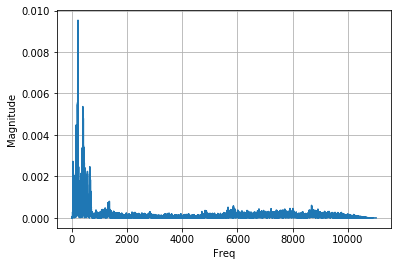

In [43]:
fft_plot(x_new, sample_rate)

In [45]:
fft_array(samples, sample_rate)

array([ 0.7621708 -0.j        , -1.1652703 +0.88283086j,
        0.35825932-1.5857176j , ..., -0.8785671 -0.8092307j ,
        0.35825932+1.5857176j , -1.1652703 -0.88283086j], dtype=complex64)

In [46]:
fft_array(x_new, sample_rate)

array([ 0.66336266-0.j        , -1.35580128+0.81173031j,
        0.73577896-1.3286252j , ..., -0.87047294-0.34280878j,
        0.73577896+1.3286252j , -1.35580128-0.81173031j])